In [1]:
import pandas as pd

In [2]:
df1=pd.read_csv("D:\CHITRA\CARDEHO\CLEAN55.csv")

In [9]:
df1.drop_duplicates(inplace=True)

In [14]:
df1.shape

(8281, 56)

In [11]:
df1.reset_index(inplace=True)

In [16]:
df1.isnull().sum()

index                  0
ft                     0
bt                     0
km                     0
ownerNo                0
oem                    0
model                  0
modelYear              0
centralVariantId       0
variantName            0
price                  0
Registration Year      0
Insurance Validity     0
Seats                  0
RTO                    0
Engine Displacement    0
Transmission           0
Features               0
Comfort                0
Interior               0
Exterior               0
Safety                 0
Entertainment          0
Acceleration           0
Alloy Wheel Size       0
Cargo Volumn           0
Color                  0
Drive Type             0
Engine Type            0
Front Brake Type       0
Front Tread            0
Fuel Suppy System      0
Gear Box               0
Height                 0
Kerb Weight            0
Length                 0
Max Power              0
Max Torque             0
Mileage                0
No Door Numbers        0


In [17]:
# Mapping dictionary
insurance_mapping = {
    'Third Party insurance': 'Third Party',
    'Third Party': 'Third Party',
    'Comprehensive': 'Comprehensive',
    'Zero Dep': 'Zero Dep',
    '2': '2 Years',
    '1': '1 Year',
    'Not Available': 'Not Available'
}

# Apply the mapping
df1['Insurance Validity'] = df1['Insurance Validity'].map(insurance_mapping)

In [18]:
# Mapping dictionary
drivetrain_mapping = {
    'FWD': 'Front-Wheel Drive', 'FWD ': 'Front-Wheel Drive', '4X2': 'Two-Wheel Drive', '4x2': 'Two-Wheel Drive',
    '2WD': 'Two-Wheel Drive', '2 WD': 'Two-Wheel Drive', 'RWD': 'Rear-Wheel Drive', 'AWD': 'All-Wheel Drive',
    '4WD': 'Four-Wheel Drive', '4X4': 'Four-Wheel Drive', 'All Wheel Drive': 'All-Wheel Drive',
    'AWD INTEGRATED MANAGEMENT': 'All-Wheel Drive', 'RWD(with MTT)': 'Rear-Wheel Drive',
    'Permanent all-wheel drive quattro': 'All-Wheel Drive','2WD ': 'Two-Wheel Drive',
    '4 WD': 'Four-Wheel Drive','Two Wheel Drive': 'Two-Wheel Drive','Front Wheel Drive':'Front-Wheel Drive','Rear Wheel Drive with ESP':'Rear-Wheel Drive'
}

# Clean dataframe
df1['Drive Type'] = df1['Drive Type'].map(drivetrain_mapping)

mode_value = df1['Drive Type'].mode()[0]
# Fill NaN values with the mode
df1['Drive Type'].fillna(mode_value, inplace=True)

In [19]:
# Function to clean and standardize steering types
def clean_steering_type(steering_type):
    steering_type = steering_type.lower()
    if 'power' in steering_type or 'epas' in steering_type:
        return 'power'
    if 'electric' in steering_type:
        return 'electric'
    if 'manual' in steering_type:
        return 'manual'
    if 'hydraulic' in steering_type:
        return 'hydraulic'
    return steering_type

# Apply the cleaning function to the column using map
df1['Steering Type'] = df1['Steering Type'].map(clean_steering_type)

In [20]:
def clean_category(i):
    # Keep digits and periods, convert to lowercase, and remove other characters
    clean = ''.join([c.lower() for c in str(i) if c.isalnum() or c == '.'])
    return clean

In [21]:
df1['Turbo Charger'] = df1['Turbo Charger'].apply(clean_category)
df1['model'] = df1['model'].apply(clean_category)
df1['variantName'] = df1['variantName'].apply(clean_category)

In [22]:
df1['Engine Type'] = df1['Engine Type'].apply(clean_category)
df1['Front Brake Type'] = df1['Front Brake Type'].apply(clean_category)
df1['Steering Type'] = df1['Steering Type'].apply(clean_category)
df1['Super Charger'] = df1['Super Charger'].apply(clean_category)
df1['Tyre Type'] = df1['Tyre Type'].apply(clean_category)

In [24]:
# Create a mapping dictionary
brand_mapping = {
    'Mahindra Renault': 'Mahindra',
    'Mahindra Ssangyong': 'Mahindra'
}

# Apply the mapping to replace value
df1["oem"] = df1["oem"].replace(brand_mapping)

In [25]:
df1

,index,ft,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,...,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width,city
0,0,Petrol,Hatchback,120000,3,Maruti,maruticelerio,2015,3979,vxi,...,90,no,4,tubelessradial,DOHC,4.0,2425,15,1635,Bangalore
1,1,Petrol,SUV,32706,2,Ford,fordecosport,2018,6087,1.5petroltitaniumbsiv,...,150,no,5,tubelessradial,DOHC,4.0,2519,16,1765,Bangalore
2,2,Petrol,Hatchback,11949,1,Tata,tatatiago,2018,2983,1.2revotronxz,...,114,no,4,tubeless,DOHC,4.0,2400,14,1647,Bangalore
3,3,Petrol,Sedan,17794,1,Hyundai,hyundaixcent,2014,1867,1.2kappasoption,...,113,no,4,tubelessradial,DOHC,4.0,2425,14,1660,Bangalore
4,4,Diesel,SUV,60000,1,Maruti,marutisx4scross,2015,4277,ddis200zeta,...,200,yes,5,tubelessradial,DOHC,4.0,2600,16,1785,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8276,8364,Petrol,Hatchback,10000,1,Maruti,maruticelerio,2022,8682,zxibsvi,...,89,no,5,tubelessradial,DOHC,4.0,2435,15,1655,Kolkata
8277,8365,Petrol,Hatchback,120000,1,Maruti,marutialto800,2014,3943,lxi,...,69,no,4,tubelesstyres,DOHC,4.0,2360,15,1490,Kolkata
8278,8366,Petrol,Sedan,50000,3,Mercedes-Benz,mercedesbenzcclass,2011,4672,c200cgielegance,...,285,no,5,tubelessradial,DOHC,4.0,2760,17,1770,Kolkata
8279,8367,Petrol,Hatchback,40000,1,Maruti,marutiritz,2012,4144,zxi,...,114,no,4,tubelessradial,DOHC,4.0,2360,14,1680,Kolkata


In [26]:
# Define the path to save the CSV file
path = 'D:\CHITRA\CARDEHO\cd_deho.csv'
# Save the DataFrame to the specified path
df1.to_csv(path, index=False)

In [27]:
df=pd.read_csv('D:\CHITRA\CARDEHO\cd_deho.csv')

In [32]:
#removing outliers

In [34]:
import pandas as pd
import numpy as np
from scipy import stats


columns = [
    'km', 'ownerNo', 'modelYear', 'centralVariantId', 'Registration Year',
    'Seats', 'Engine Displacement', 'Gear Box', 'Height', 'Kerb Weight',
    'Length', 'Max Power', 'Max Torque', 'Mileage', 'No Door Numbers',
    'No of Cylinder', 'Torque', 'Wheel Base', 'Width', 'Wheel Size',
    'Values per Cylinder', 'Turning Radius', 'Top Speed', 'Rear Tread',
    'Front Tread', 'Cargo Volumn', 'Alloy Wheel Size', 'Acceleration', 'price'
]

# Calculate Z-scores and identify outliers
for col in columns:
    df[f'{col}_Z'] = stats.zscore(df[col])
    outliers = df[np.abs(df[f'{col}_Z']) > 3]
    print(f"Column: {col}")
    print(f"Number of outliers: {len(outliers)}")

# Remove outliers from the dataframe
df_cleaned = df[np.abs(df[[f'{col}_Z' for col in columns]]).max(axis=1) <= 3]

# Drop Z-score columns
df = df_cleaned.drop(columns=[f'{col}_Z' for col in columns])

print(f"Original size: {len(df)}")
print(f"Filtered size: {len(df_cleaned)}")


Column: km
Number of outliers: 5
Column: ownerNo
Number of outliers: 95
Column: modelYear
Number of outliers: 65
Column: centralVariantId
Number of outliers: 0
Column: Registration Year
Number of outliers: 65
Column: Seats
Number of outliers: 84
Column: Engine Displacement
Number of outliers: 206
Column: Gear Box
Number of outliers: 151
Column: Height
Number of outliers: 61
Column: Kerb Weight
Number of outliers: 139
Column: Length
Number of outliers: 60
Column: Max Power
Number of outliers: 177
Column: Max Torque
Number of outliers: 113
Column: Mileage
Number of outliers: 41
Column: No Door Numbers
Number of outliers: 57
Column: No of Cylinder
Number of outliers: 169
Column: Torque
Number of outliers: 113
Column: Wheel Base
Number of outliers: 95
Column: Width
Number of outliers: 61
Column: Wheel Size
Number of outliers: 51
Column: Values per Cylinder
Number of outliers: 1
Column: Turning Radius
Number of outliers: 1
Column: Top Speed
Number of outliers: 173
Column: Rear Tread
Number 

In [36]:
df.reset_index(inplace=True)

In [37]:
df

,level_0,index,ft,bt,km,ownerNo,oem,model,modelYear,centralVariantId,...,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width,city
0,0,0,Petrol,Hatchback,120000,3,Maruti,maruticelerio,2015,3979,...,90,no,4,tubelessradial,DOHC,4.0,2425,15,1635,Bangalore
1,1,1,Petrol,SUV,32706,2,Ford,fordecosport,2018,6087,...,150,no,5,tubelessradial,DOHC,4.0,2519,16,1765,Bangalore
2,2,2,Petrol,Hatchback,11949,1,Tata,tatatiago,2018,2983,...,114,no,4,tubeless,DOHC,4.0,2400,14,1647,Bangalore
3,3,3,Petrol,Sedan,17794,1,Hyundai,hyundaixcent,2014,1867,...,113,no,4,tubelessradial,DOHC,4.0,2425,14,1660,Bangalore
4,4,4,Diesel,SUV,60000,1,Maruti,marutisx4scross,2015,4277,...,200,yes,5,tubelessradial,DOHC,4.0,2600,16,1785,Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7278,8276,8364,Petrol,Hatchback,10000,1,Maruti,maruticelerio,2022,8682,...,89,no,5,tubelessradial,DOHC,4.0,2435,15,1655,Kolkata
7279,8277,8365,Petrol,Hatchback,120000,1,Maruti,marutialto800,2014,3943,...,69,no,4,tubelesstyres,DOHC,4.0,2360,15,1490,Kolkata
7280,8278,8366,Petrol,Sedan,50000,3,Mercedes-Benz,mercedesbenzcclass,2011,4672,...,285,no,5,tubelessradial,DOHC,4.0,2760,17,1770,Kolkata
7281,8279,8367,Petrol,Hatchback,40000,1,Maruti,marutiritz,2012,4144,...,114,no,4,tubelessradial,DOHC,4.0,2360,14,1680,Kolkata


In [38]:
df.columns

Index(['level_0', 'index', 'ft', 'bt', 'km', 'ownerNo', 'oem', 'model',
       'modelYear', 'centralVariantId', 'variantName', 'price',
       'Registration Year', 'Insurance Validity', 'Seats', 'RTO',
       'Engine Displacement', 'Transmission', 'Features', 'Comfort',
       'Interior', 'Exterior', 'Safety', 'Entertainment', 'Acceleration',
       'Alloy Wheel Size', 'Cargo Volumn', 'Color', 'Drive Type',
       'Engine Type', 'Front Brake Type', 'Front Tread', 'Fuel Suppy System',
       'Gear Box', 'Height', 'Kerb Weight', 'Length', 'Max Power',
       'Max Torque', 'Mileage', 'No Door Numbers', 'No of Cylinder',
       'Rear Brake Type', 'Rear Tread', 'Steering Type', 'Super Charger',
       'Top Speed', 'Torque', 'Turbo Charger', 'Turning Radius', 'Tyre Type',
       'Value Configuration', 'Values per Cylinder', 'Wheel Base',
       'Wheel Size', 'Width', 'city'],
      dtype='object')

In [39]:
import pandas as pd

# List of columns to drop
columns_to_drop = ['level_0', 'index']

# Dropping the columns
df = df.drop(columns=columns_to_drop)


In [41]:
#ENCODING

In [42]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Initialize LabelEncoders
encoders = {}

# Fit LabelEncoder on each categorical column and save the encoder
for col in df.select_dtypes(include="object").columns:
    enc = LabelEncoder()
    df[col] = enc.fit_transform(df[col])
    encoders[col] = enc

# Save the encoders
joblib.dump(encoders, 'now_cat.pkl')


['now_cat.pkl']

In [43]:
df.corr()

,ft,bt,km,ownerNo,oem,model,modelYear,centralVariantId,variantName,price,...,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width,city
ft,1.000000,-0.278943,-0.333890,-0.036244,0.007100,-0.014880,0.084767,0.154210,0.056112,-0.246651,...,-0.682893,-0.720533,-0.248322,-0.008647,0.131939,0.089727,-0.368076,-0.251275,-0.397503,-0.022371
bt,-0.278943,1.000000,0.063470,-0.039728,-0.088918,-0.056497,0.085444,-0.004512,-0.024736,0.372025,...,0.481416,0.376744,0.487918,-0.070229,0.097436,0.027370,0.514090,0.417365,0.502546,0.015402
km,-0.333890,0.063470,1.000000,0.241753,-0.029216,-0.023906,-0.539163,-0.398849,-0.094319,-0.256952,...,0.122698,0.180916,-0.009483,0.029380,0.063467,-0.092384,0.031320,-0.142553,0.009284,-0.021242
ownerNo,-0.036244,-0.039728,0.241753,1.000000,-0.044362,-0.036884,-0.341158,-0.233918,-0.054974,-0.177548,...,-0.022932,-0.037793,-0.038452,0.046266,0.072594,-0.071711,-0.049969,-0.127248,-0.071034,-0.062309
oem,0.007100,-0.088918,-0.029216,-0.044362,1.000000,0.979750,0.142003,0.312289,0.068824,-0.019685,...,-0.048526,0.058489,-0.142017,0.095809,-0.293616,0.103730,-0.050313,-0.013436,-0.057519,-0.004580
model,-0.014880,-0.056497,-0.023906,-0.036884,0.979750,1.000000,0.131662,0.281743,0.042686,0.026346,...,0.003194,0.090002,-0.099429,0.063082,-0.307365,0.099771,-0.014354,0.018177,-0.011566,-0.010647
modelYear,0.084767,0.085444,-0.539163,-0.341158,0.142003,0.131662,1.000000,0.625256,0.077911,0.459151,...,0.089753,0.085478,0.125889,-0.083847,-0.201403,0.149828,0.151574,0.432341,0.217961,-0.017257
centralVariantId,0.154210,-0.004512,-0.398849,-0.233918,0.312289,0.281743,0.625256,1.000000,0.271484,0.249845,...,-0.049791,-0.022913,-0.002836,-0.143842,-0.271966,0.179695,0.013562,0.235351,0.079955,-0.026814
variantName,0.056112,-0.024736,-0.094319,-0.054974,0.068824,0.042686,0.077911,0.271484,1.000000,-0.032164,...,-0.089017,-0.081515,-0.052069,0.043922,-0.025807,0.055584,-0.114195,-0.103091,-0.076883,0.049740
price,-0.246651,0.372025,-0.256952,-0.177548,-0.019685,0.026346,0.459151,0.249845,-0.032164,1.000000,...,0.675052,0.414070,0.402521,-0.109472,-0.149246,0.123355,0.664256,0.710602,0.661061,-0.120015


In [44]:
#FEATURE IMPORTANCE

In [46]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression


# Define features and target
X = df.drop('price', axis=1)
y = df['price']

# Correlation analysis
correlation_matrix = df.corr()
print(correlation_matrix['price'].sort_values(ascending=False))

# Feature importance using RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(importance_df.sort_values(by='Importance', ascending=False))

# Univariate feature selection
selector = SelectKBest(score_func=f_regression, k=10)
selector.fit(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


price                  1.000000
Max Power              0.749584
Alloy Wheel Size       0.710602
Wheel Size             0.710602
Kerb Weight            0.680625
Max Torque             0.675052
Torque                 0.675052
Gear Box               0.665806
Wheel Base             0.664256
Width                  0.661061
Length                 0.603643
Engine Displacement    0.551573
Top Speed              0.471344
modelYear              0.459151
Registration Year      0.455413
Turbo Charger          0.414070
Turning Radius         0.402521
Front Tread            0.391424
Rear Tread             0.388784
bt                     0.372025
Cargo Volumn           0.321583
Height                 0.277775
centralVariantId       0.249845
No of Cylinder         0.236309
Seats                  0.188106
Values per Cylinder    0.123355
Entertainment          0.113436
Super Charger          0.027082
model                  0.026346
No Door Numbers        0.021871
Drive Type             0.011423
oem     

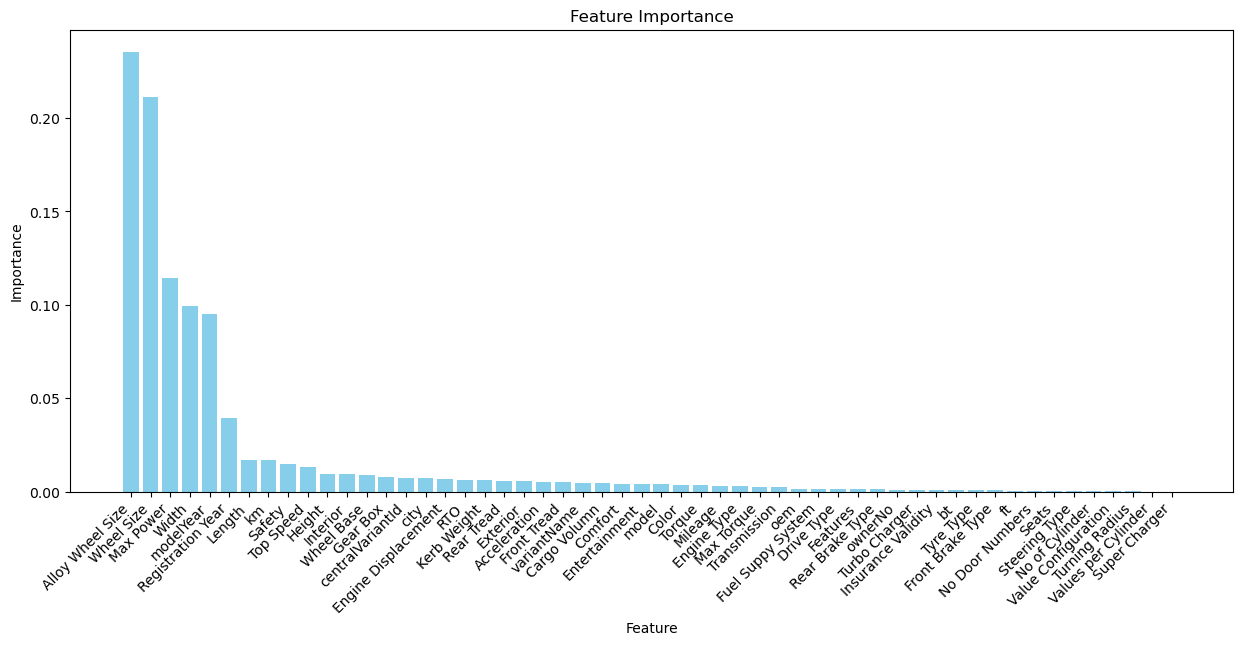

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# X and y are features and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Get feature importance
importances = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance as a bar chart
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()


In [61]:
feature_columns=['Gear Box', 'Kerb Weight', 'Max Power','Engine Displacement','modelYear','oem','Transmission','ft','km',
       'Torque','Wheel Size']

In [62]:
#EDA

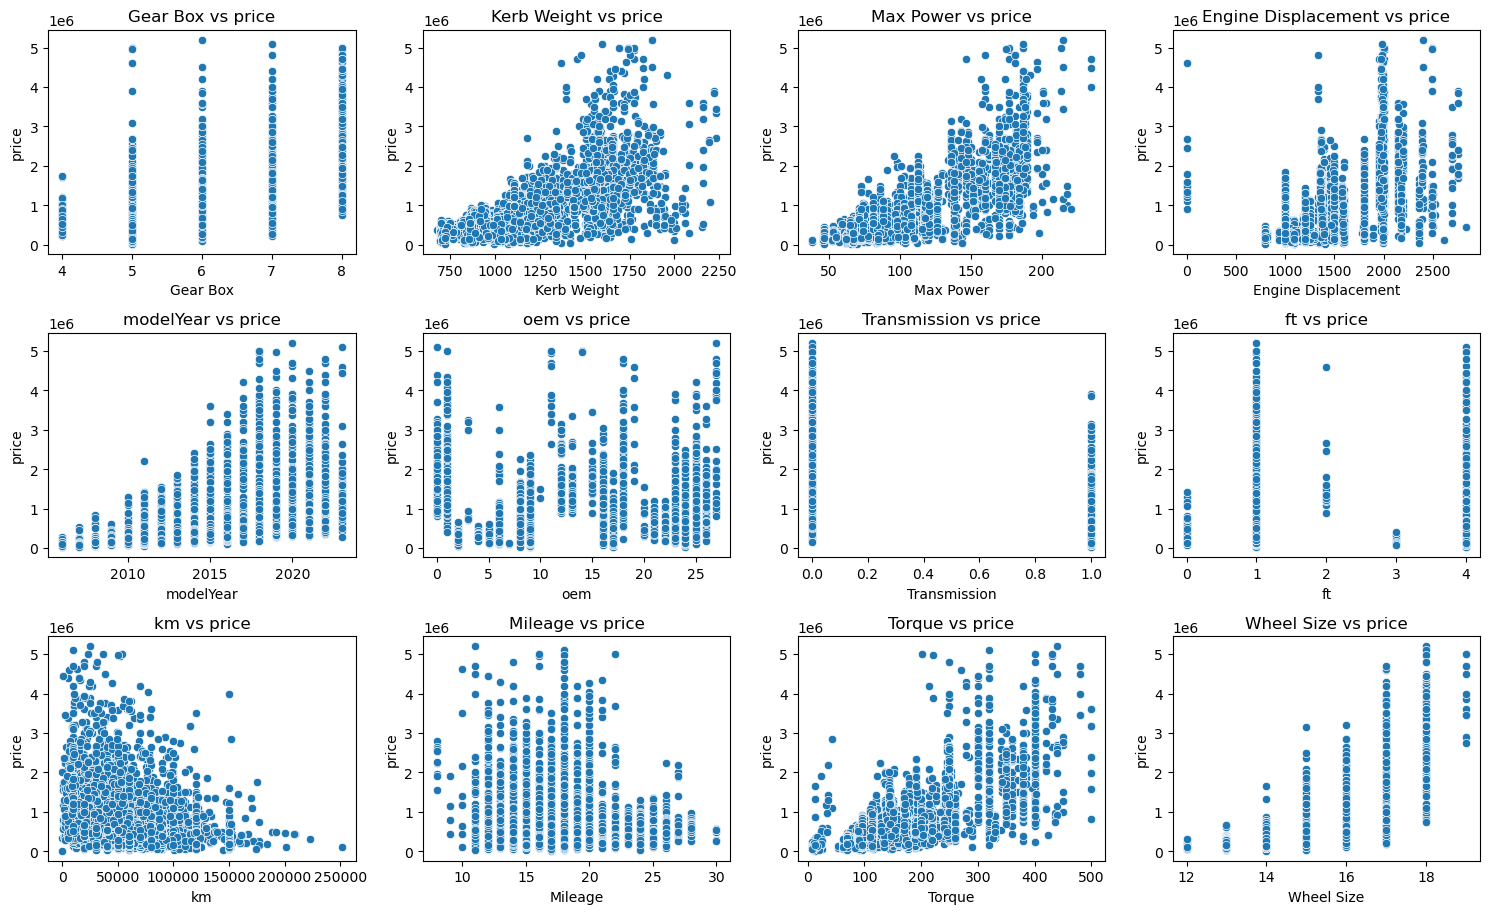

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# feature columns and target variable
feature_columns = ['Gear Box', 'Kerb Weight', 'Max Power', 'Engine Displacement', 'modelYear', 'oem', 'Transmission', 'ft', 'km', 'Mileage', 'Torque', 'Wheel Size']
target_column = 'price'

# Create a figure with subplots
plt.figure(figsize=(15, 12))

# Iterate over each feature column
for i, feature in enumerate(feature_columns):
    plt.subplot(4, 4, i+1)  # Adjust the number of rows and columns according to the number of features
    sns.scatterplot(x=df[feature], y=df[target_column])
    plt.title(f'{feature} vs {target_column}')
    plt.xlabel(feature)
    plt.ylabel(target_column)

# show the plot
plt.tight_layout()
plt.show()


In [64]:
#model

In [72]:
feature_columns=['Gear Box', 'Kerb Weight', 'Max Power','Engine Displacement','modelYear','oem','Transmission','ft','km',
       'Torque','Wheel Size']
X = df[feature_columns]
y = df['price']
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on training set
    y_train_pred = model.predict(X_train)
    
    # Predictions on test set
    y_test_pred = model.predict(X_test)
    
    # Calculate MSE and R² for training set
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Calculate MSE and R² for test set
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Store the results
    results[name] = {
        'Train MSE': train_mse,
        'Train R2': train_r2,
        'Test MSE': test_mse,
        'Test R2': test_r2
    }
    
    # Print the results
    print(f"{name}:")
    print(f"  Train MSE: {train_mse}")
    print(f"  Train R2 Score: {train_r2}")
    print(f"  Test MSE: {test_mse}")
    print(f"  Test R2 Score: {test_r2}")
    print("\n")


Linear Regression:
  Train MSE: 91542357967.1403
  Train R2 Score: 0.7441411871092761
  Test MSE: 98293657001.95718
  Test R2 Score: 0.7474663081463124


Decision Tree:
  Train MSE: 117572680.79906169
  Train R2 Score: 0.9996713870255731
  Test MSE: 56965741409.57104
  Test R2 Score: 0.8536449916900027


Random Forest:
  Train MSE: 4337562685.56772
  Train R2 Score: 0.9878766107383117
  Test MSE: 35188889996.421
  Test R2 Score: 0.9095935528896585


Gradient Boosting:
  Train MSE: 23500347328.63782
  Train R2 Score: 0.9343170625757391
  Test MSE: 35875255500.68349
  Test R2 Score: 0.9078301591973374




In [66]:
#Random Forest

In [74]:
import joblib
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the fitted model
joblib.dump(model, 'cd_model.pkl')

['cd_model.pkl']

In [68]:
import pandas as pd

# Create a mapping from brands to numerical values
oem_brands = ['Maruti', 'Ford', 'Tata', 'Hyundai', 'Jeep', 'Datsun', 'Honda',
              'Mahindra', 'Mercedes-Benz', 'BMW', 'Renault', 'Audi', 'Toyota',
              'Mini', 'Kia', 'Skoda', 'Volkswagen', 'Volvo', 'MG', 'Nissan',
              'Fiat',  'Mitsubishi', 'Jaguar', 'Land Rover',
              'Chevrolet', 'Citroen', 'Opel', 'Isuzu',
              'Lexus', 'Porsche', 'Hindustan Motors']
oem_mapping = {brand: idx for idx, brand in enumerate(oem_brands)}

# Save the mapping for later use in Streamlit
import joblib
joblib.dump(oem_mapping, 'now_oem_mapping.pkl')

['now_oem_mapping.pkl']

In [69]:
import joblib

# Define the fuel types and their numerical encodings
fuel_types = ['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric']
fuel_mapping = {fuel: idx for idx, fuel in enumerate(fuel_types)}

# Save the mapping
joblib.dump(fuel_mapping, 'now_fuel_mapping.pkl')


['now_fuel_mapping.pkl']

In [91]:
import joblib
import pandas as pd

# Load the mapping dictionaries and the trained model
oem_mapping = joblib.load('now_oem_mapping.pkl')
fuel_mapping = joblib.load('now_fuel_mapping.pkl')
model = joblib.load('cd_model.pkl')  # Load the trained model

# The user input
user_input = {
    'Gear Box': 6,
    'Kerb Weight':1350,
    'Max Power': 108,
    'Engine Displacement':1461,
    'modelYear': 2017,
    'oem': 'Mitsubishi',
    'Transmission': 'Automatic',
    'ft': 'Diesel',  # Fuel type
    'km': 120000,
    'Torque':245,
    'Wheel Size': 16,
    
}

# Convert user input into a DataFrame
input_df = pd.DataFrame([user_input])

# Encode categorical features using mappings
# Convert fuel type
input_df['ft'] = input_df['ft'].map(fuel_mapping)
# Convert transmission (used 0 and 1 for Manual and Automatic)
input_df['Transmission'] = input_df['Transmission'].map({'Manual': 0, 'Automatic': 1})
# Convert OEM
input_df['oem'] = input_df['oem'].map(oem_mapping)

# Predict the price
predicted_price = model.predict(input_df)

print("Predicted Price:", predicted_price[0])


Predicted Price: 613399.98


In [100]:
df['oem'].head()

0    17
1     6
2    24
3     9
4    17
Name: oem, dtype: int32

In [98]:
import pandas as pd



# Define the feature columns
feature_columns = ['Gear Box', 'Kerb Weight', 'Max Power', 'Engine Displacement', 'modelYear', 'oem', 'Transmission', 'ft', 'km', 'Torque', 'Wheel Size']

# Initialize dictionaries to store min and max values
min_values = {}
max_values = {}

# Iterate through the feature columns
for col in feature_columns:
    if df[col].dtype in ['int64', 'float64']:  # Check if the column is numerical
        min_values[col] = df[col].min()
        max_values[col] = df[col].max()
    else:
        # For categorical columns, you might want to get the unique values or handle them differently
        min_values[col] = 'N/A'
        max_values[col] = 'N/A'

# Print the min and max values
print("Min Values:")
for col, val in min_values.items():
    print(f"{col}: {val}")

print("\nMax Values:")
for col, val in max_values.items():
    print(f"{col}: {val}")


Min Values:
Gear Box: 4
Kerb Weight: 675
Max Power: 38
Engine Displacement: 0
modelYear: 2006
oem: N/A
Transmission: N/A
ft: N/A
km: 0
Torque: 7
Wheel Size: 12

Max Values:
Gear Box: 8
Kerb Weight: 2235
Max Power: 235
Engine Displacement: 2835
modelYear: 2023
oem: N/A
Transmission: N/A
ft: N/A
km: 251066
Torque: 500
Wheel Size: 19
